In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
DATASET_PATH = "/content/drive/MyDrive/shapes_5/"

In [3]:
#Importamos las librerías

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os

In [4]:
print("En este dataset se entrenará un modelo de red neuronal para clasificar imágenes, en este caso es un dataset de formas geométricas descargado de Kaggle desde https://www.kaggle.com/datasets/smeschke/four-shapes")

En este dataset se entrenará un modelo de red neuronal para clasificar imágenes, en este caso es un dataset de formas geométricas descargado de Kaggle desde https://www.kaggle.com/datasets/smeschke/four-shapes


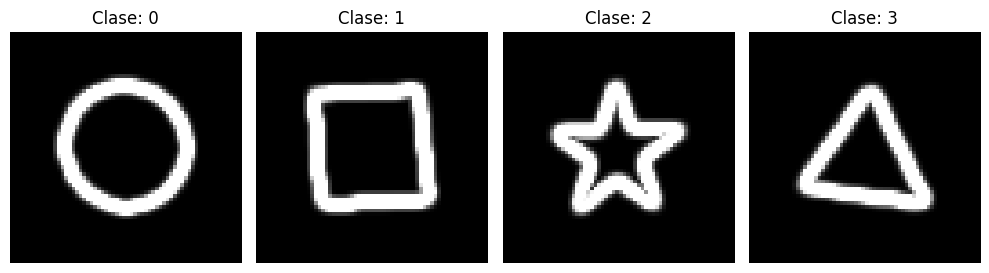

In [17]:
# Mostrar una imagen por clase
plt.figure(figsize=(10, 10))

shown_classes = set()
shown_indices = []

for idx, label_vec in enumerate(y):
    label = np.argmax(label_vec)  # convertir one-hot a entero para evitar un error
    if label not in shown_classes:
        shown_classes.add(label)
        shown_indices.append((idx, label))
    if len(shown_classes) == len(np.unique(np.argmax(y, axis=1))):
        break

for i, (idx, label) in enumerate(shown_indices):
    plt.subplot(1, len(shown_classes), i + 1)
    plt.imshow(X[idx], cmap='gray')
    plt.title(f"Clase: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
print("Se aplicará un filtro Gaussiano, este suaviza la imagen, lo cual ayuda a mejorar la detección de bordes.")
print("Como segundo filtro se aplicará Sobel, este resalta los bordes de las figuras")

#Ambos filtros resultan apropiados para la clasficiación de formas geométricas donde los bordes resultan particularmente relevantes.

Se aplicará un filtro Gaussiano, este suaviza la imagen, lo cual ayuda a mejorar la detección de bordes.
Como segundo filtro se aplicará Sobel, este resalta los bordes de las figuras


In [6]:
def apply_filters(image):
    # 1. Filtro Gaussiano para suavizar
    blurred = cv2.GaussianBlur(image, (5, 5), 0) #Definimos el filtro gaussiano

    # 2. Filtro Sobel para detectar bordes
    sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3) #Definimos el filtro Sobel
    sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel = np.uint8(np.clip(sobel, 0, 255))

    return sobel

In [7]:
# Cargar imágenes
images = []
labels = []
class_names = []

for idx, class_name in enumerate(sorted(os.listdir(DATASET_PATH))):
    class_path = os.path.join(DATASET_PATH, class_name)
    if os.path.isdir(class_path):
        class_names.append(class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            filtered = apply_filters(img)
            images.append(filtered)
            labels.append(idx)

In [8]:
# Convertir a arrays y normalizar
X = np.array(images).reshape(-1, 64, 64, 1) / 255.0
y = to_categorical(labels)

In [9]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Cambia a la cantidad de clases que tengas
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.6671 - loss: 0.7061 - val_accuracy: 0.9605 - val_loss: 0.0950
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.9925 - loss: 0.0442 - val_accuracy: 0.9934 - val_loss: 0.0347
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.9976 - loss: 0.0118 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.8204e-04
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 1.0000 - loss: 4.6973e-04 - val_accuracy: 1.0000 - val_loss: 6.4681e-04
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 1.0000 - loss: 3.6273e-04 - val_accuracy: 1.0000 - val_loss: 4.2646e-04
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 1.0000 - loss: 2.7969e-04 - val_accuracy: 1.0000 - val_loss: 3.4806e-04
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 1.0000 - los

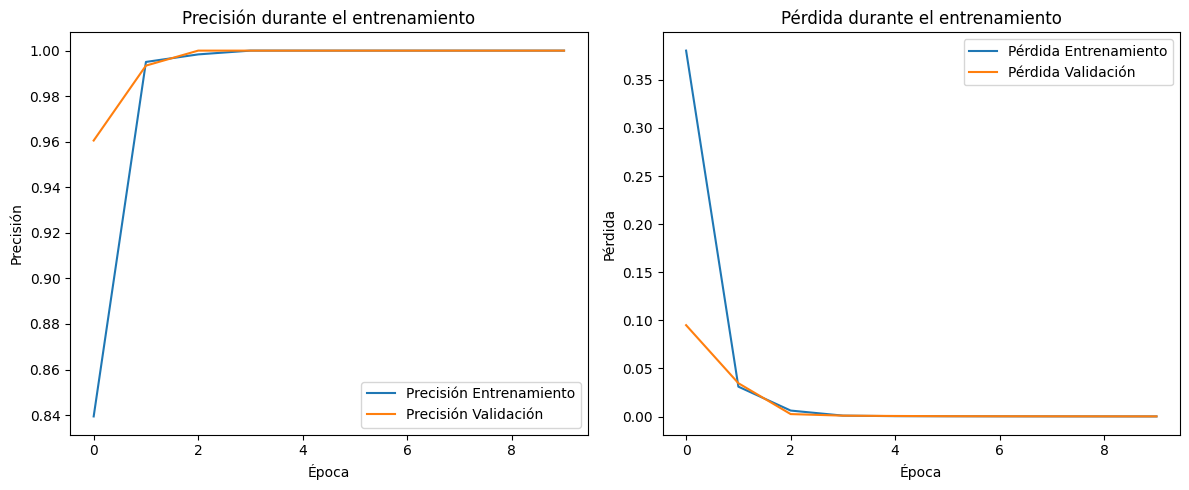

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Precisión Entrenamiento")
plt.plot(history.history['val_accuracy'], label="Precisión Validación")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.title("Precisión durante el entrenamiento")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Pérdida Entrenamiento")
plt.plot(history.history['val_loss'], label="Pérdida Validación")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Pérdida durante el entrenamiento")

plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


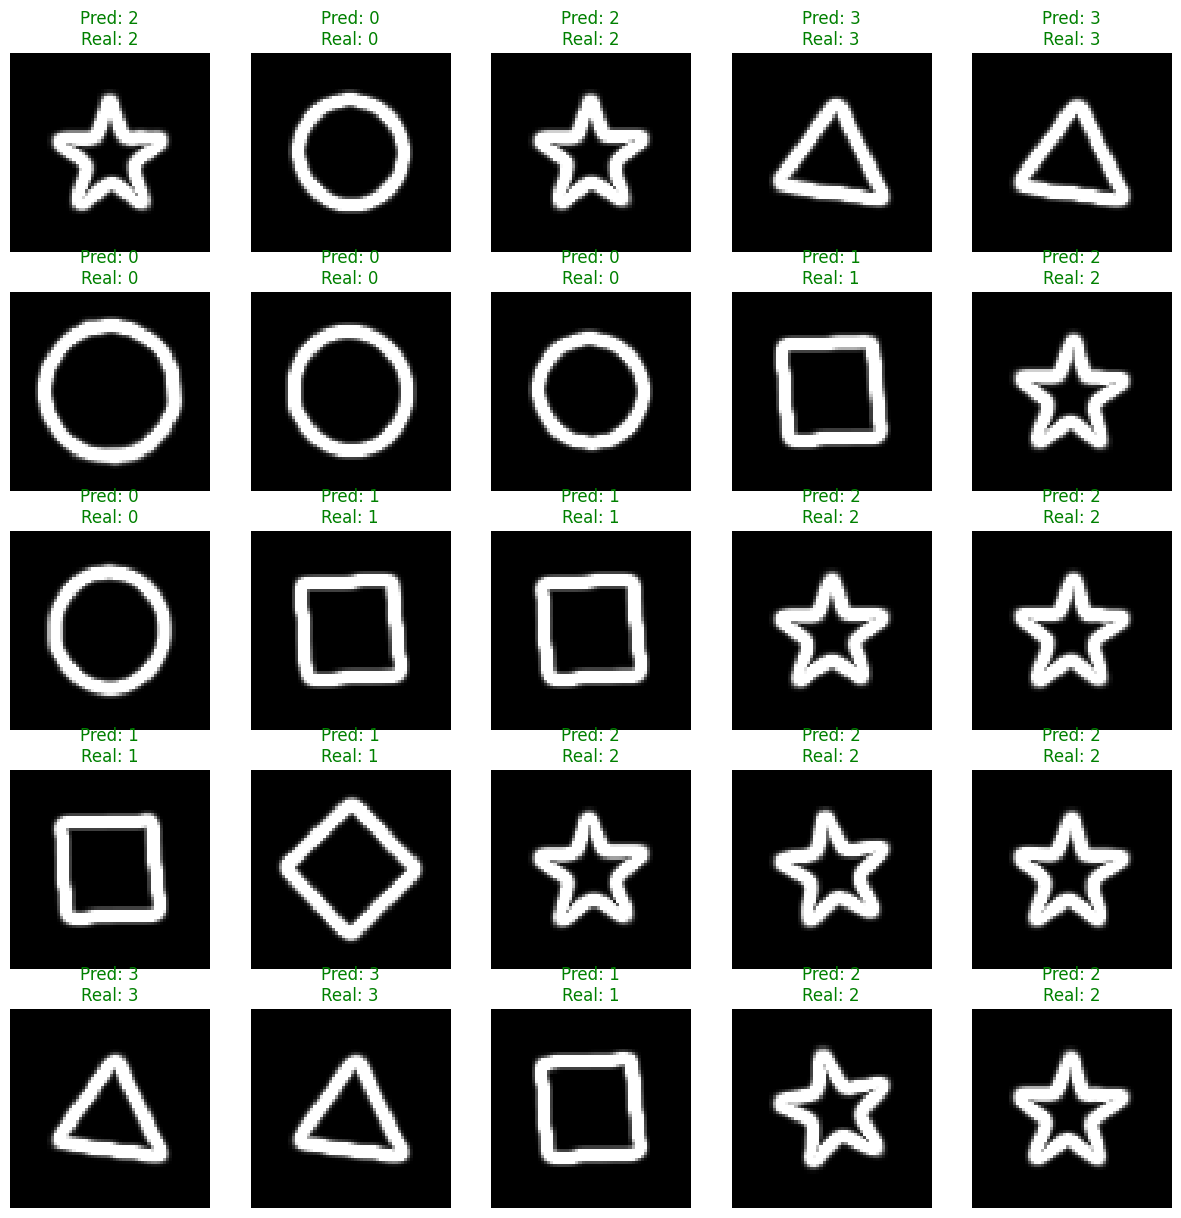

In [22]:
## ¿Funciona el código?

predictions=model.predict(X_test)
predicted_labels=np.argmax(predictions,axis=1)
true_labels=np.argmax(y_test,axis=1)

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {predicted_labels[i]}\nReal: {true_labels[i]}", color=color)
    plt.axis('off')
plt.show()